# TASK 1:Iris Flower Classification with Machine Learning

## IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D


##  Load the dataset

In [2]:
file_path = 'C:\\Users\\murug\\OneDrive\\Desktop\\Iris.csv'
df = pd.read_csv('C:\\Users\\murug\\OneDrive\\Desktop\\Iris.csv')

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# Drop the 'Id' column as it's not useful for classification
df = df.drop(columns=['Id'])


First 5 rows of the dataset:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [3]:
# Encode the 'Species' column
label_encoder = LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])


## Split the data into features and target

In [5]:
X = df.drop(['Species'], axis=1)
y = df['Species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the RandomForest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Model Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Confusion matrix

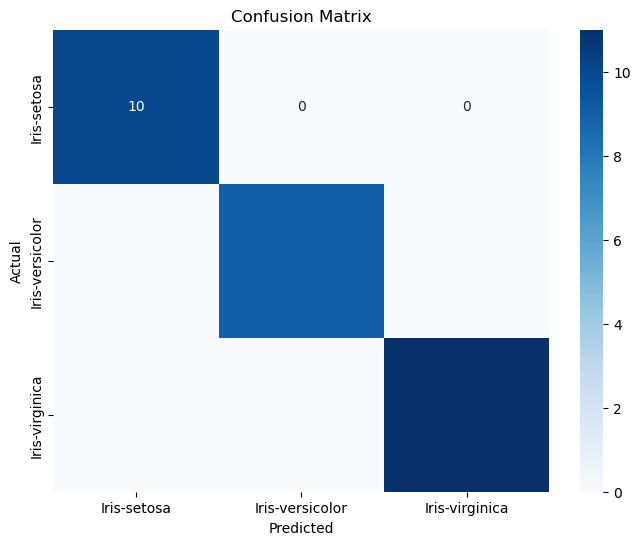

In [6]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Visualizations

### 1. Pairplot of features

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

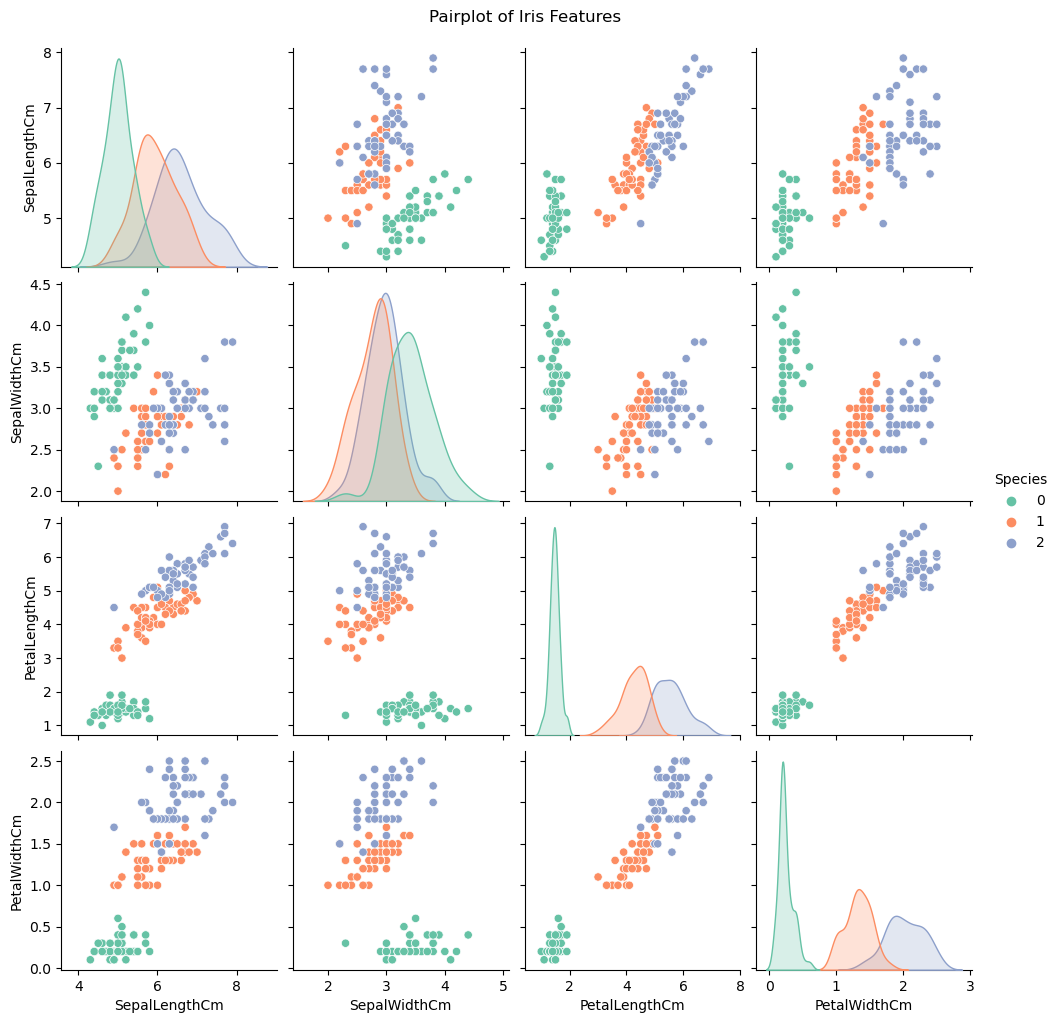

In [7]:
sns.pairplot(df, hue='Species', palette='Set2')
plt.suptitle('Pairplot of Iris Features', y=1.02)
plt.show()


###  2. Feature importance bar chart

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

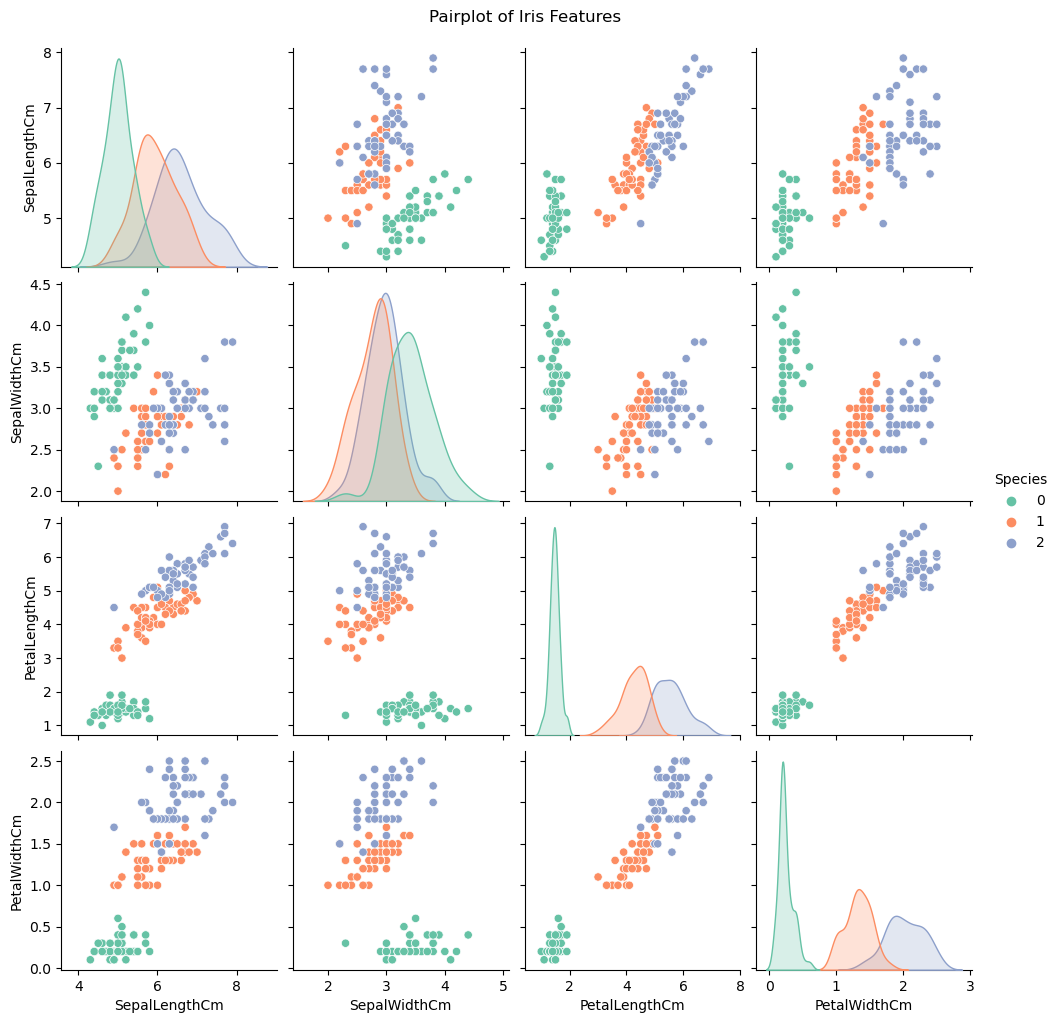

<Figure size 640x480 with 0 Axes>

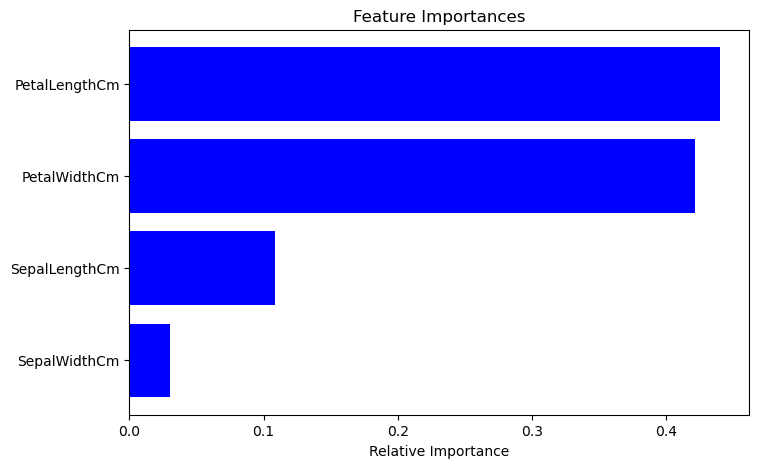

In [9]:
sns.pairplot(df, hue='Species', palette='Set2')
plt.suptitle('Pairplot of Iris Features', y=1.02)
plt.show()

plt.suptitle('Pairplot of Iris Features', y=1.02)
plt.show()

importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(8, 5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### 3. 3D Scatter plot: Sepal Length vs Sepal Width vs Petal Length

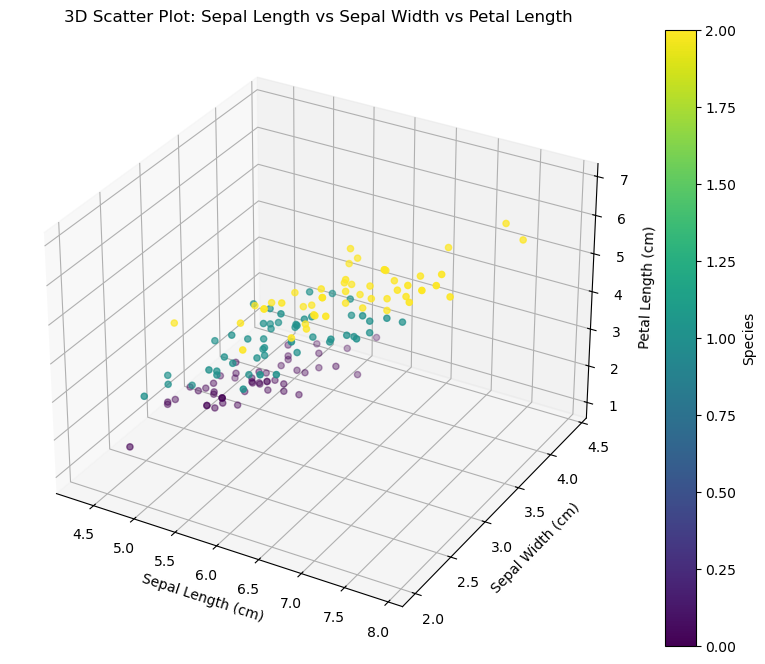

In [10]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['SepalLengthCm'], df['SepalWidthCm'], df['PetalLengthCm'], c=df['Species'], cmap='viridis')
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_zlabel('Petal Length (cm)')
plt.title('3D Scatter Plot: Sepal Length vs Sepal Width vs Petal Length')
plt.colorbar(scatter, ax=ax, label='Species')
plt.show()


###  4. Boxplot of features

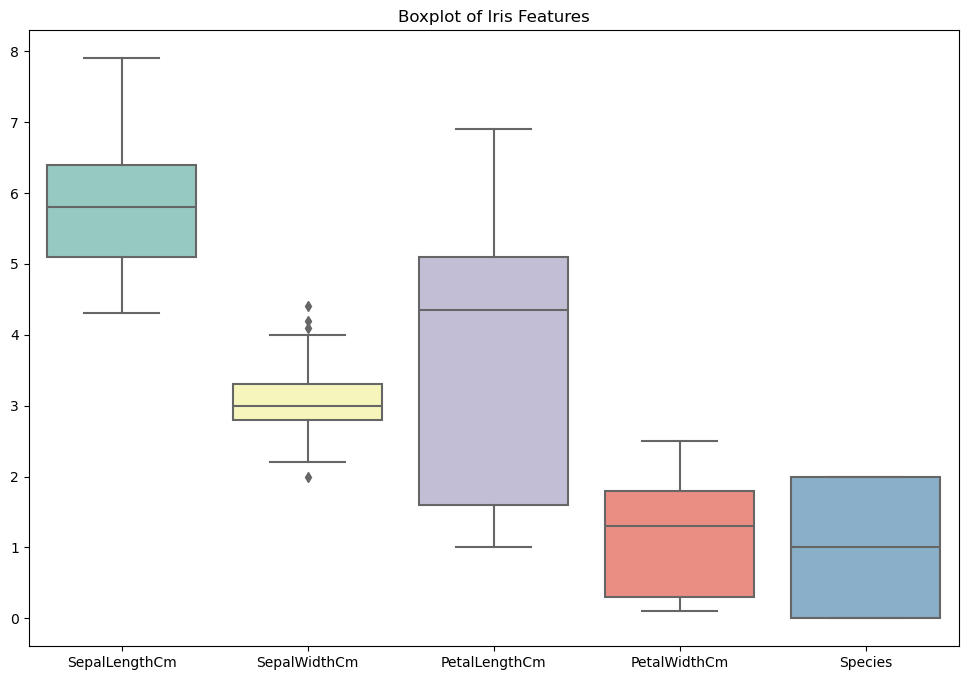

In [11]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, palette='Set3')
plt.title('Boxplot of Iris Features')
plt.show()


### 5. Actual vs Predicted species scatter plot
